In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
from parse import parse

from alphaMusic.utils.fls_utils import load_from_pkl
import alphaMusic.evaluation as evl

In [19]:
sns.set(style='whitegrid', context='paper', font_scale=1.2,
        rc={
            'figure.figsize':(3.5,3.15), 
            'lines.linewidth':1.5,
            'font.family': 'serif',
            'text.usetex': False,
            })
pal = sns.cubehelix_palette(7, start=0.5, rot=-0.5,dark=0.3, light=.75, reverse=True, hue=1.)

In [3]:
path_to_results = Path('..','recipes','EUSIPCO22','results')
assert path_to_results.exists()

files = path_to_results.glob('N:180*RT60:sweep*.pkl')
exp_name = 'N:{n_samples}_RT60:{rt60_name}_SNR:{snr_name}_DRR:{drr_name}_nsrcs:{n_srcs}_nmics:{n_mics}_noise:{noise_type}'

results = pd.DataFrame()
for file in files:
    print(file)
    params = parse(exp_name,str(file.name))
    df = load_from_pkl(file)
    df['n_mics'] = int(params['n_mics'])
    df['n_srcs'] = int(params['n_srcs'])
    results = pd.concat([results, df], ignore_index=True)

../recipes/EUSIPCO22/results/N:180_RT60:sweep_SNR:10_DRR:1.0_nsrcs:3_nmics:4_noise:cafet_results.pkl
../recipes/EUSIPCO22/results/N:180_RT60:sweep_SNR:10_DRR:1.0_nsrcs:2_nmics:4_noise:cafet_results.pkl
../recipes/EUSIPCO22/results/N:180_RT60:sweep_SNR:10_DRR:1.0_nsrcs:1_nmics:4_noise:cafet_results.pkl
../recipes/EUSIPCO22/results/N:180_RT60:sweep_SNR:10_DRR:1.0_nsrcs:4_nmics:4_noise:cafet_results.pkl


In [4]:
df = pd.DataFrame()

for r, row in results.iterrows():
    
    # compute metrics
    doas_est = row['DOAs_est']
    doas_ref = row['DOAs']
    
    metrics = evl.compute_ssl_metrics(doas_est, doas_ref)
    
    df.at[r,'algo'] = row['algo']

    df.at[r,'MAE'] = metrics['MAE']
    df.at[r,'RMSE'] = metrics['RMSE']
    df.at[r,'ACC5'] = metrics['ACC5']
    df.at[r,'ACC10'] = metrics['ACC10']
    df.at[r,'MISS'] = metrics['MISS']
    
    # params
    df.at[r,'SNR'] = row['SNR']
    df.at[r,'RT60'] = row['RT60']
    df.at[r,'n_mics'] = row['n_mics']
    df.at[r,'n_srcs'] = row['n_srcs']
    df.at[r,'alpha'] = row['alpha']
    df.at[r,'p'] = row['p'] if not np.isnan(row['p']) else 0
    df.at[r,'time'] = row['time']

In [5]:
df.head(40)

,algo,MAE,RMSE,ACC5,ACC10,MISS,SNR,RT60,n_mics,n_srcs,alpha,p,time
0,MUSIC,24.333333,28.172090,0.000000,0.000000,0.0,10.0,1.00,4.0,3.0,NaN,0.0,0.015683
1,aMUSIC,16.000000,17.262677,0.000000,0.000000,0.0,10.0,1.00,4.0,3.0,1.586327,1.0,0.030534
2,aMUSIC,26.000000,30.994623,0.000000,33.333333,0.0,10.0,1.00,4.0,3.0,1.500000,1.0,0.016963
3,aMUSIC,37.000000,41.653331,0.000000,0.000000,0.0,10.0,1.00,4.0,3.0,1.800000,1.0,0.017062
4,aMUSIC,31.000000,36.189317,0.000000,0.000000,0.0,10.0,1.00,4.0,3.0,1.590195,1.5,0.035866
5,aMUSIC,19.000000,22.869193,0.000000,0.000000,0.0,10.0,1.00,4.0,3.0,1.500000,1.5,0.022744
6,aMUSIC,33.333333,41.344085,33.333333,33.333333,0.0,10.0,1.00,4.0,3.0,1.800000,1.5,0.023616
7,NormMUSIC,19.666667,24.826062,33.333333,33.333333,0.0,10.0,1.00,4.0,3.0,NaN,0.0,0.014706
8,aNormMUSIC,17.333333,22.671568,33.333333,33.333333,0.0,10.0,1.00,4.0,3.0,1.592324,1.0,0.029224
9,aNormMUSIC,5.333333,7.615773,66.666667,66.666667,0.0,10.0,1.00,4.0,3.0,1.500000,1.0,0.018118


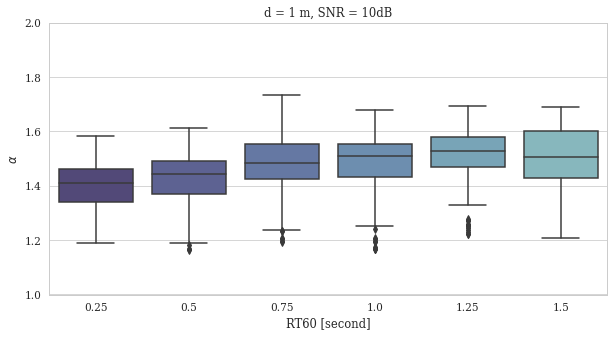

In [40]:
plt.figure(figsize=(10,5))
plt.title('d = 1 m, SNR = 10dB')
sns.boxplot(x='RT60', y='alpha',
            palette=pal,
            data=df.loc[(df['algo'] == 'aMUSIC') & 
                        (df['alpha'] != 1.5) & (df['alpha'] != 1.8)
                       ])
plt.ylim((1,2))
plt.ylabel(r'$\alpha$')
plt.xlabel('RT60 [second]')
plt.savefig('../recipes/EUSIPCO22/figures/alpha_RT60.pdf',dpi=300)
plt.show()

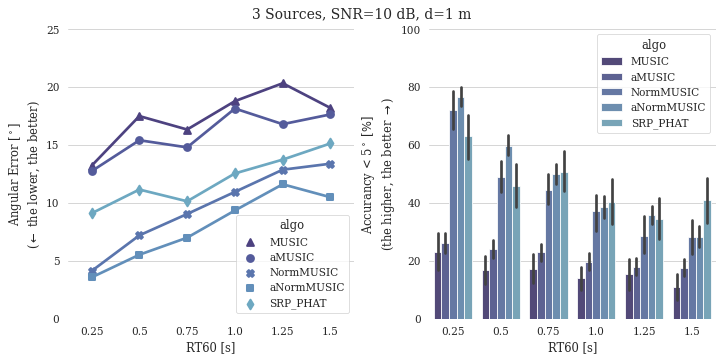

In [37]:
curr_df = df.loc[((df['alpha'] != 1.5) | (df['alpha'] != 1.8)) & (df['p'] != 1)]

for n_srcs in [3]:
    plt.figure(figsize=(10,5))
    plt.suptitle(f'{n_srcs} Sources, SNR=10 dB, d=1 m')
    plt.subplot(121)
    sns.pointplot(x='RT60', y='MAE', hue='algo', 
                  palette=pal,
                  data=curr_df.loc[curr_df['n_srcs'] == n_srcs],
                  markers=['^','o','X','s','d','v','*'],
                  ci=None
    )
    plt.ylim([0,25])
    plt.ylabel('Angular Error [$^\circ$]\n' + r'($\leftarrow$ the lower, the better)')
    plt.xlabel('RT60 [s]')
    
    plt.subplot(122)
    sns.barplot(x='RT60', y='ACC5', hue='algo', 
                palette=pal,
                data=curr_df.loc[curr_df['n_srcs'] == n_srcs],
    )
    plt.ylim([0,100])
    plt.ylabel('Accurancy < 5$^\circ$ [$\%$]\n'+ r'(the higher, the better $\rightarrow$)')
    plt.xlabel('RT60 [s]')
    sns.despine(offset=10, trim=False, left=True, bottom=True)
    plt.tight_layout(pad=0.5)
plt.savefig('../recipes/EUSIPCO22/figures/mae_acc_3srcs_RT60.pdf',dpi=300)
plt.show()

In [ ]:
# for p in [1.0, 1.5]:
    
#     curr_df = df.loc[(df['p'] == p) | (df['p'] == 0)]

#     algo_order = ['MUSIC','aMUSIC','NormMUSIC','aNormMUSIC''SRP_PHAT']

#     plt.figure(figsize=(20,5))
#     plt.suptitle('For all SNR values')

#     plt.subplot(131)
#     sns.barplot(x='algo', y='MAE', data=curr_df[['algo','MAE']],
#                hue_order=algo_order, palette=pal)
#     plt.ylim([0,30])
#     plt.xticks(rotation=45)
#     plt.ylabel('Angular Error [$^\circ$] \n $\leftarrow$ the lower, the better')
#     plt.xlabel('Algorithim')

#     plt.subplot(132)
#     sns.barplot(x='algo', y='ACC5', data=curr_df[['algo','ACC5']],
#                hue_order=algo_order, palette=pal)
#     plt.ylim([0,100])
#     plt.xticks(rotation=45)
#     plt.ylabel('Accurancy < 5 $\circ$ [$\%$]')
#     plt.xlabel('Algorithim')

#     plt.subplot(133)
#     sns.barplot(x='algo', y='MISS', data=curr_df[['algo','MISS']],
#                hue_order=algo_order, palette=pal)
#     plt.ylim([0,100])
#     plt.xticks(rotation=45)
#     plt.ylabel('Miss [$\%$] \n the lower, the better')
#     plt.xlabel('Algorithim')

#     # sns.despine(offset=10, trim=False, left=True, bottom=True)
#     plt.tight_layout(pad=0.5)
#     plt.show()

In [ ]:
# for n_srcs in [1,2,3,4]:
#     plt.figure(figsize=(20,5))
#     plt.subplot(131)
#     plt.title(f'n_srcs {n_srcs}')
#     sns.pointplot(x='RT60', y='MAE', hue='algo', 
#                   palette=pal,
#                   data=df.loc[df['n_srcs'] == n_srcs],
#                   markers=['^','o','X','s','d','v','*'],
#                   ci=None
#     )
#     plt.subplot(132)
#     sns.barplot(x='RT60', y='ACC5', hue='algo', 
#                 palette=pal,
#                 data=df.loc[df['n_srcs'] == n_srcs],
#     )
#     plt.subplot(133)
#     sns.barplot(x='RT60', y='MISS', hue='algo', 
#                 palette=pal,
#                 data=df.loc[df['n_srcs'] == n_srcs],
#     )
    
#     plt.tight_layout()